数据目录格式: `../xtt/6.18整晚/DATA -00011/BCG DATA-00011`

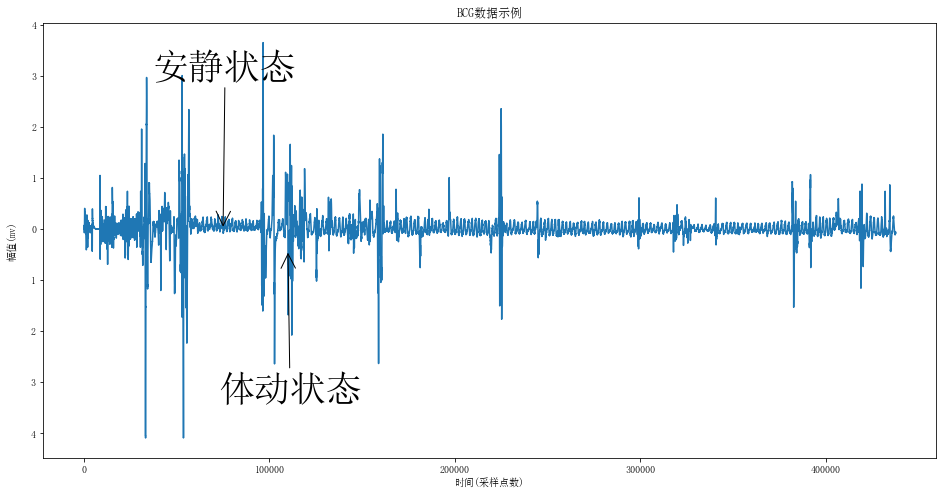

In [31]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = ['SimSun','宋体']
import numpy as np

pwd = '../xtt/6.18整晚/DATA -00011/BCG DATA-00011/BCGdata-00001.txt'
lines = np.loadtxt(pwd, dtype='float')
plt.figure(figsize=(16,8))
plt.title('BCG数据示例')
plt.xlabel('时间(采样点数)')
plt.ylabel('幅值(mv)')
plt.plot(lines)
plt.annotate(r'安静状态', xy=(75000, lines[75000]), xycoords='data', xytext=(-70, +150),
             textcoords='offset points', fontsize=36,
             arrowprops=dict(arrowstyle='->'))
plt.annotate(r'体动状态', xy=(110000, lines[110000]), xycoords='data', xytext=(-70, -150),
             textcoords='offset points', fontsize=36,
             arrowprops=dict(arrowstyle='->'))
plt.show()


目标为对信号波形的分类：如体动和安静状态
可以提取的信号特征有：
### 平均值 $\bar{X} = \frac{1}{n} \sum_{i=1}^{n}x_i$
### 方差 $\delta ^2 = \frac{1}{n-1}\sum_{i=1}^{n}\left ( x_i - \bar{X} \right )^2$ 
### 峰值 $X_{peak} = max\left ( \left | x_i \right | \right )$
### 整流平均值 $X_{arv} = \frac{1}{n}\sum_{i = 1}^{n}\left | x_i \right |$ 
### 均方根值 $X_{rms}=\sqrt{\frac{1}{n}\sum_{i=1}^{n}x_i^2}$
### 鞘度指标 $K = \frac{\frac{1}{n}\sum_{i=1}^{n}\left ( x_i - \bar{X} \right )^4}{\delta ^4}$
### 峰值因子 $C=X_{peak}/X_{rms}$
### 脉冲指标 $I = X_{peak}/X_{arv}$
### 波形因子 $S = X_{rms}/X_{arv}$
### 裕度系数 $L = \frac{\mbox{峰值}}{\mbox{方根幅值}} = \frac{X_{peak}}{\left [ \frac{1}{n}\sum_{i=1}^{n}\sqrt{\left | x_i \right |} \right ]^2}$
### 偏斜度 $\alpha = \frac{\frac{1}{n}\sum_{i=1}^{n}\left ( x_i - \bar{X} \right )^3}{\delta ^3}$
### 过零点数 `信号由正到负或由负变正穿过零点的次数`

已经标注好的数据在`../xtt/6.18整晚/6.18labview计算结果.xlsx`文件里，一个sheet对应一个数据，其中每45个数据点作为一个周期集合，一行有四个数据，倒数第二个数据为离床判定 1 为离床，倒数第一个为体动判定 1 为体动。下图为标注完成后的数据，红色为体动标注数据。

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


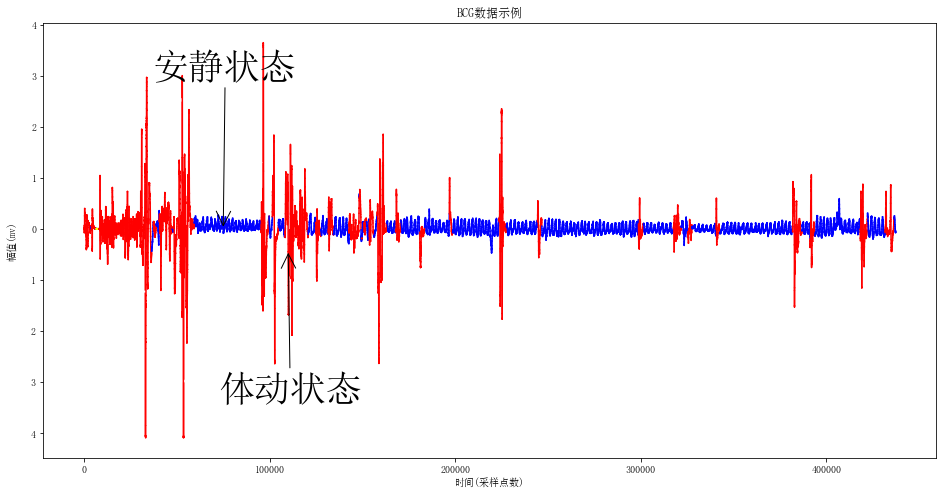

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

matplotlib.rcParams['font.family'] = ['SimSun', '宋体']
N = 0

df = pd.read_excel('../xtt/6.18整晚/6.18labview计算结果.xlsx', sheet_name=1, header=None)
pwd = '../xtt/6.18整晚/DATA -00011/BCG DATA-00011/BCGdata-00001.txt'
lines = pd.Series(np.loadtxt(pwd, dtype='float'))
plt.figure(figsize=(16, 8))
plt.title('BCG数据示例')
plt.xlabel('时间(采样点数)')
plt.ylabel('幅值(mv)')
plt.annotate(r'安静状态', xy=(75000, lines[75000]), xycoords='data', xytext=(-70, +150),
             textcoords='offset points', fontsize=36,
             arrowprops=dict(arrowstyle='->'))
plt.annotate(r'体动状态', xy=(110000, lines[110000]), xycoords='data', xytext=(-70, -150),
             textcoords='offset points', fontsize=36,
             arrowprops=dict(arrowstyle='->'))
for index, row in df.iterrows():
    if (row[3] == 1):
        plt.plot(range(0 + 45 * N, 45 + 45 * N), lines.loc[0 + 45 * N:44 + 45 * N], color='red')
    elif (row[2] == 1):
        plt.plot(range(0 + 45 * N, 45 + 45 * N), lines.loc[0 + 45 * N:44 + 45 * N], color='yellow')
    else:
        plt.plot(range(0 + 45 * N, 45 + 45 * N), lines.loc[0 + 45 * N:44 + 45 * N], color='blue')
    N = N + 1
plt.show()
